# Домашнее задание "Визуализация данных в Python"

Построить 5 графиков по выбранным данным. 

Графики должны быть различных видов и использовать хотя бы 2 из рассмотренных на занятии библиотек. 

Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.

Можно взять свой датасет или воспользоваться одним из приведенных ниже:

Данные IMDB;
Данные NYC;
Данные NBA.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams
#увеличим дефолтный размер графиков
rcParams['figure.figsize'] = 10,7
df = pd.read_csv('covid_19_data.csv')
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [7]:
## подготовка столбцов, правильная дата, удаление ненужных, переименование столбцов
df['Date'] = pd.to_datetime(df['ObservationDate'], format='%m/%d/%Y')
df.drop(['ObservationDate', 'Last Update', 'SNo'], axis=1, inplace=True)
df.rename(columns={'Country/Region':'Country', 'Province/State':'State' }, inplace=True)
df

,State,Country,Confirmed,Deaths,Recovered,Date
0,Anhui,Mainland China,1.0,0.0,0.0,2020-01-22
1,Beijing,Mainland China,14.0,0.0,0.0,2020-01-22
2,Chongqing,Mainland China,6.0,0.0,0.0,2020-01-22
3,Fujian,Mainland China,1.0,0.0,0.0,2020-01-22
4,Gansu,Mainland China,0.0,0.0,0.0,2020-01-22
...,...,...,...,...,...,...
23799,Wyoming,US,669.0,7.0,0.0,2020-05-11
23800,Xinjiang,Mainland China,76.0,3.0,73.0,2020-05-11
23801,Yukon,Canada,11.0,0.0,0.0,2020-05-11
23802,Yunnan,Mainland China,185.0,2.0,183.0,2020-05-11


# 1. Динамика роста зараженных, умерших, выздоровевших по времени


In [8]:
#сумма данных по дате
df_grouped = df.groupby(by = 'Date').sum() 
display(df_grouped)


,Confirmed,Deaths,Recovered
Date,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0
...,...,...,...
2020-05-07,3845718.0,269567.0,1284741.0
2020-05-08,3938064.0,274898.0,1322050.0
2020-05-09,4024009.0,279311.0,1375624.0


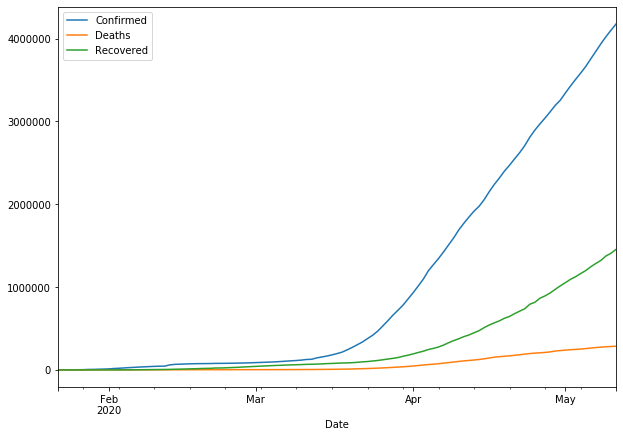

In [9]:
df_grouped.plot()

в конце марта начинается значительное распространение вируса, 
в начале апреля несколько больше стали выздоравливать


# 2. Top 10 стран по зараженным на момент сбора dataset-a


столбчатая диаграмма для визуального сравнения

In [10]:
# объединение по всем регионам страны на каждую дату
df_by_country = df.groupby(['Country', 'Date']).sum()
# выделение итогового значения (максимального) на последнюю дату для каждой страны:
df_by_country = df_by_country.reset_index().groupby(by ='Country').max().sort_values(by = 'Confirmed', ascending = False).reset_index()
display(df_by_country)

,Country,Date,Confirmed,Deaths,Recovered
0,US,2020-05-11,1347881.0,80682.0,232733.0
1,Spain,2020-05-11,236899.0,26744.0,137139.0
2,UK,2020-05-11,224332.0,32141.0,1015.0
3,Russia,2020-05-11,221344.0,2009.0,39801.0
4,Italy,2020-05-11,219814.0,30739.0,106587.0
...,...,...,...,...,...
217,Greenland,2020-03-21,1.0,0.0,0.0
218,Guernsey,2020-03-21,1.0,0.0,0.0
219,North Ireland,2020-02-28,1.0,0.0,0.0
220,Republic of the Congo,2020-03-21,1.0,0.0,0.0


In [11]:
df_by_country2 = df_by_country.head(10)
df_by_country2

,Country,Date,Confirmed,Deaths,Recovered
0,US,2020-05-11,1347881.0,80682.0,232733.0
1,Spain,2020-05-11,236899.0,26744.0,137139.0
2,UK,2020-05-11,224332.0,32141.0,1015.0
3,Russia,2020-05-11,221344.0,2009.0,39801.0
4,Italy,2020-05-11,219814.0,30739.0,106587.0
5,France,2020-05-11,177547.0,26646.0,56835.0
6,Germany,2020-05-11,172576.0,7661.0,145617.0
7,Brazil,2020-05-11,169594.0,11653.0,67384.0
8,Turkey,2020-05-11,139771.0,3841.0,95780.0
9,Iran,2020-05-11,109286.0,6685.0,87422.0


Text(0.5, 1.0, 'Top 10 contries with confirmed cases')

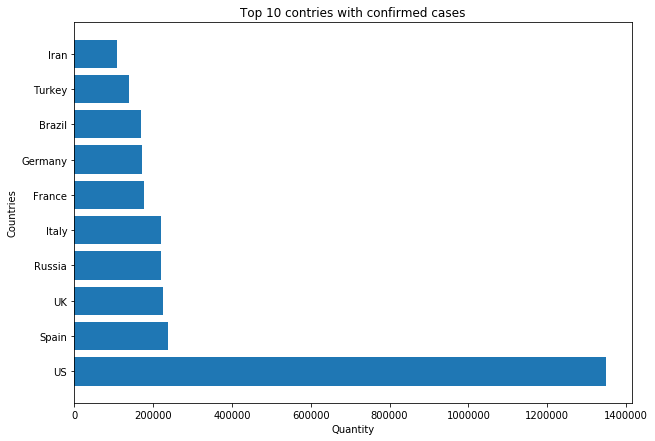

In [12]:
plt.barh(df_by_country2['Country'], df_by_country2['Confirmed'])
plt.xlabel('Quantity')
plt.ylabel('Countries')
plt.title('Top 10 contries with confirmed cases')

Выводы

количество зараженных
США - больше всех зараженных,
Испания, Англия, Россия и Италия - примерно одинаково


In [13]:
df_by_country.loc[df_by_country.Country == 'Mainland China']

,Country,Date,Confirmed,Deaths,Recovered
10,Mainland China,2020-05-11,82919.0,4633.0,78171.0


# 3. Уровень смертности в 10 странах с наибольшим распространением вируса¶

In [14]:
df_by_country['Mortality'] = df_by_country.Deaths / df_by_country.Confirmed * 100
df_by_country[df_by_country.Confirmed > 5000].sort_values(by='Mortality', ascending=False).head()

,Country,Date,Confirmed,Deaths,Recovered,Mortality
14,Belgium,2020-05-11,53449.0,8707.0,13697.0,16.290295
5,France,2020-05-11,177547.0,26646.0,56835.0,15.007857
2,UK,2020-05-11,224332.0,32141.0,1015.0,14.327425
4,Italy,2020-05-11,219814.0,30739.0,106587.0,13.984096
15,Netherlands,2020-05-11,42987.0,5475.0,322.0,12.736409


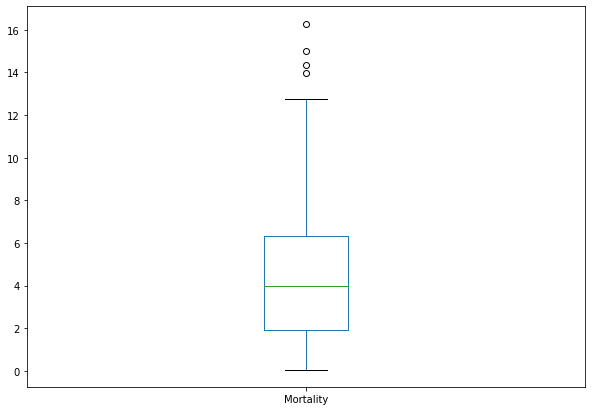

In [15]:
df_by_country[df_by_country.Confirmed > 5000]['Mortality'].plot(kind='box')

Выводы
Boxplot построен по одному столбцу - смертность (в %)- наглядно видно средний 4% (медианный) уровень, максимальный 13% и минимальный- 0%, а также выбросы
смертность в большиенсве стран менее 5%, есть ряд стран, в которых сметрность аномально высокая - вплоть до 30%
выбросы могут быть связаны тем, что в некоторых странах мала статистика

<BarContainer object of 10 artists>

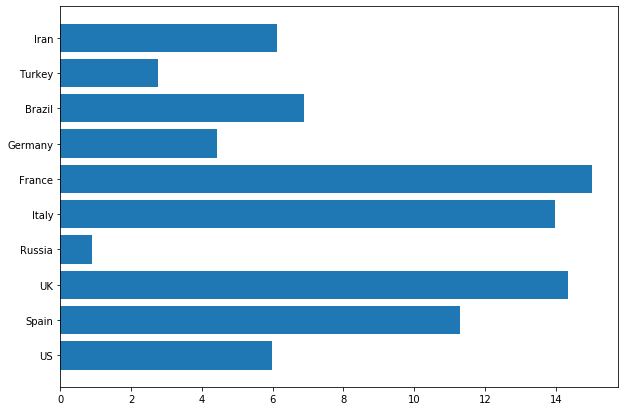

In [16]:
plt.barh(df_by_country['Country'].head(10), df_by_country['Mortality'].head(10))

<BarContainer object of 10 artists>

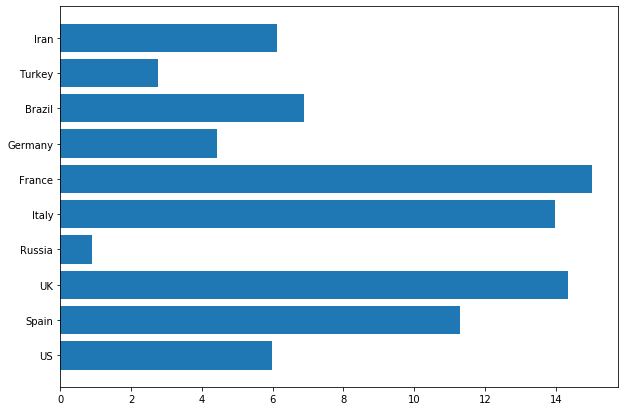

In [17]:
plt.barh(df_by_country['Country'].head(10), df_by_country['Mortality'].head(10))

# 4 Распределение смертности

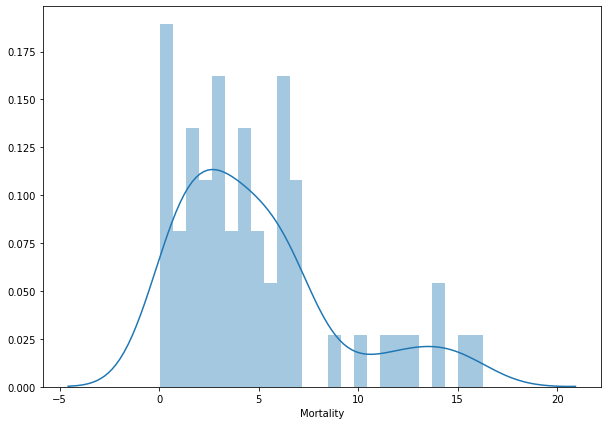

In [18]:
sns.distplot(df_by_country[df_by_country.Confirmed > 5000]['Mortality'], bins=25 )

Вывод
Распределение смертности по странам с количеством заболевших более 10 тыс. человек

большнство стран действительно сдерживают смертность не более 6-8%
страны по сметрности от вируса можно разделить на две группы - до 6%, 10-17%

# 5 Текущее соотношение болеющих, выздоровевших и умерших (по миру)

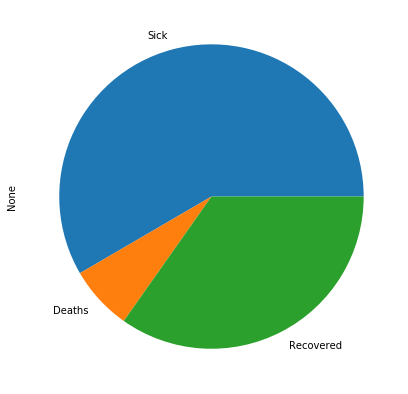

In [19]:
df_by_country['Sick'] = df_by_country['Confirmed'] - df_by_country['Deaths'] - df_by_country['Recovered']
sum_categories = df_by_country[['Sick', 'Deaths','Recovered']].sum()
sum_categories.plot.pie()

Вывод
Круговая диаграмма - наглядно показывает соотнешение категорий людей, затронутых вирусом (всего 3 категории)
пока больше половины выявленных зараженных еще болеет, больше четверти уже побороло болезнь

# 6 Разные пробы

In [20]:
df_ua = df[df.Country == 'Ukraine'][['Date','Confirmed','Deaths', 'Recovered']]
df_ua['ts'] = df_ua.Date.astype('int64') 
display(df_ua)

,Date,Confirmed,Deaths,Recovered,ts
3230,2020-03-03,1.0,0.0,0.0,1583193600000000000
3390,2020-03-04,1.0,0.0,0.0,1583280000000000000
3563,2020-03-05,1.0,0.0,0.0,1583366400000000000
3760,2020-03-06,1.0,0.0,0.0,1583452800000000000
3984,2020-03-07,1.0,0.0,0.0,1583539200000000000
...,...,...,...,...,...
22361,2020-05-07,13691.0,340.0,2396.0,1588809600000000000
22684,2020-05-08,14195.0,361.0,2706.0,1588896000000000000
23007,2020-05-09,14710.0,376.0,2909.0,1588982400000000000
23330,2020-05-10,15232.0,391.0,3060.0,1589068800000000000


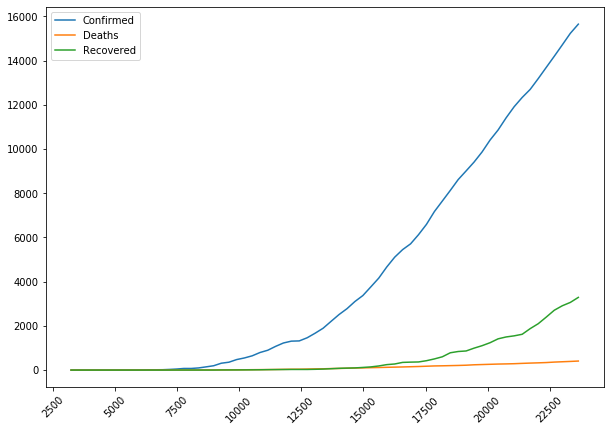

In [21]:
df_ua[['Confirmed','Deaths', 'Recovered']].plot(kind = 'line',rot=45)

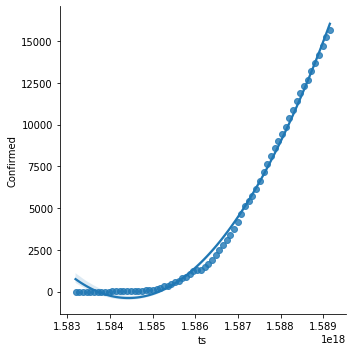

In [22]:
sns.lmplot(x='ts',y="Confirmed", data=df_ua, order = 2);

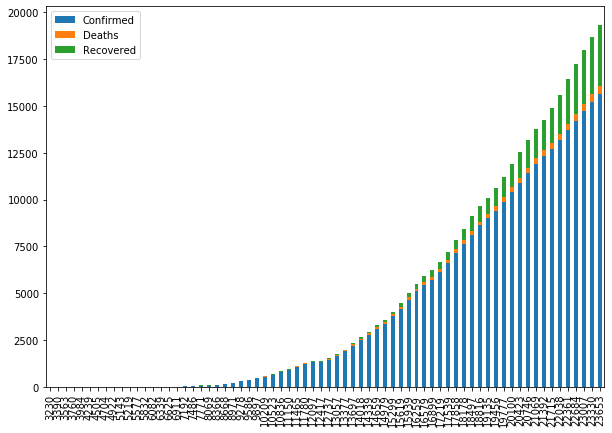

In [23]:
df_ua[['Confirmed','Deaths', 'Recovered']].plot(kind='bar', rot=90, stacked=True)

In [1]:
!pip install plotly==4.7.1

  Using cached plotly-4.7.1-py2.py3-none-any.whl (11.5 MB)


In [3]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [24]:
trace0 = go.Scatter(
    x=df_by_country.Confirmed,
    y=df_by_country.Recovered,
    mode = 'markers+text',
    text = df_by_country.Country,
    textposition='bottom center'
)

data = [trace0]
layout = {'title': 'Confirmed and Recovered', 'yaxis': {'title': 'Recovered'}, 
          'xaxis': {'title': 'Confirmed'}}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)